In [3]:
import qiskit as Q

Q.IBMQ.enable_account('7878608ddefeee59708be671ed00d631b124cf308d6d4e9d3e480616c141c711a0cd4674fc780af5e556e17a4cfe44132a07ba768f538d1116b44772e392795b')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

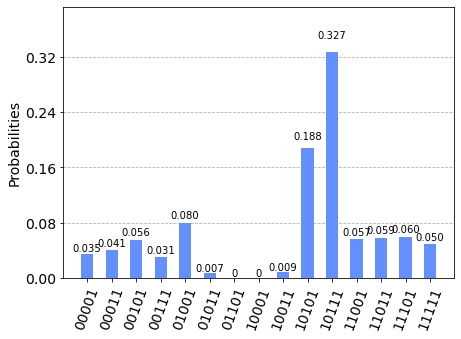

In [4]:
import qiskit as Q
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

qr = Q.QuantumRegister(6)
cr = Q.ClassicalRegister(5)
qc = Q.QuantumCircuit(qr,cr)
qc.h([0])
for i in range(15):
    qc.h([0])
    qc.cx([0],[1])
    qc.x([1])
    qc.ccx([0],[1],[2])
    qc.x([2])
    qc.mcx([0,1,2],[3])
    qc.x([3])
    qc.mcx([0,1,2,3],[4])
    qc.x([4])
    qc.mcx([0,1,2,3,4],[5])
    qc.x([0])
    qc.mcx([0,1,2,3,4],[5])
    qc.x([4])
    qc.mcx([0,1,2,3],[4])
    qc.x([3])
    qc.mcx([0,1,2],[3])
    qc.x([2])
    qc.ccx([0],[1],[2])
    qc.x([1])
    qc.cx([0],[1])


#qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[0])
qc.measure(qr[2],cr[1])
qc.measure(qr[3],cr[2])
qc.measure(qr[4],cr[3])
qc.measure(qr[5],cr[4])

#print(qc)


# plot random generator probability distribution
provider = Q.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = Q.execute(qc , backend = qcomp , shots = 4096)
counts = job.result().get_counts()
#print(counts)
plot_histogram(counts)




In [5]:
def qrandint():
    provider = Q.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
    qcomp = provider.get_backend('ibmq_qasm_simulator')
    job = Q.execute(qc , backend = qcomp , shots = 1)
   
    result = job.result().get_counts()
    print(result)
    
    key, = result
    
    return int(key, 2)
    

In [8]:
import time
t0 = time.time()
time.sleep(1)
print('time cost: {}'.format(time.time() - t0))

time cost: 1.0004844665527344


In [54]:
import random 

total = 0

bucket_len = 500
N = 1 # number of simultaion
M = 10*bucket_len # number of bonding attempts in each simultaion


x = []
y = []

for i in range(N):
    
    buckets = []
    for i in range(bucket_len):
        buckets.append(0)


    for i in range(M): # could collide infinitely 
        idx = random.randint(0, bucket_len-1)
#         print('time cost: {}'.format(time.time() - t0))
#         idx = qrandint()
#         print('time cost: {}'.format(time.time() - t0))
        if(idx != bucket_len-1 and buckets[idx] != 1 and buckets[idx+1] != 1):
            buckets[idx] = 1
            buckets[idx+1] = 1
        
        if i % 10 == 9:
            r = sum(buckets) / bucket_len
            print(r)
            
            x.append(i)
            y.append(r)
            
 
     

    print(buckets)

    ans = sum(buckets) / bucket_len
    print(ans)


    total = total + ans

expectation  = total / N
print(expectation)

0.04
0.068
0.104
0.132
0.164
0.196
0.224
0.244
0.272
0.296
0.312
0.336
0.356
0.372
0.396
0.416
0.432
0.444
0.452
0.456
0.468
0.484
0.492
0.504
0.516
0.524
0.528
0.528
0.532
0.54
0.548
0.552
0.56
0.572
0.588
0.596
0.6
0.612
0.632
0.644
0.648
0.656
0.656
0.656
0.664
0.668
0.672
0.68
0.692
0.696
0.704
0.704
0.704
0.716
0.716
0.72
0.728
0.736
0.736
0.744
0.744
0.748
0.76
0.76
0.768
0.772
0.772
0.776
0.78
0.78
0.788
0.788
0.788
0.788
0.792
0.792
0.796
0.8
0.804
0.804
0.808
0.812
0.816
0.816
0.816
0.816
0.816
0.816
0.82
0.824
0.824
0.824
0.824
0.828
0.828
0.828
0.828
0.832
0.836
0.836
0.836
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.844
0.848
0.848
0.848
0.852
0.852
0.852
0.852
0.852
0.852
0.852
0.852
0.852
0.852
0.852
0.852
0.852
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.856
0.85

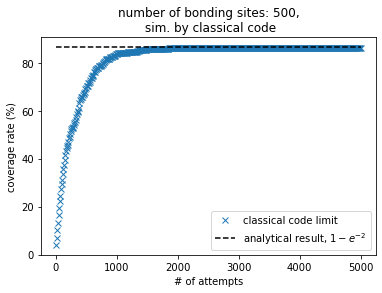

In [70]:
import numpy as np
npx = np.asarray(x)
npy = np.asarray(y)

fig,ax = plt.subplots()

ax.plot(npx, npy*100, ls='none', marker='x', label = 'classical code limit')
ax.plot(npx, [100-100*np.e**-2]*len(npx), ls='--', label = 'analytical result, $1-e^{-2}$', color = 'black')
ax.set_title('number of bonding sites: {},\n sim. by classical code'.format(bucket_len))
ax.set_xlabel('# of attempts')
ax.set_ylabel('coverage rate (%)')
ax.legend()